### Librerias

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box
from matplotlib import colors
import matplotlib.patches as mpatches

## 2. Datos.

Se trabajará con los datos de Landsat enfocados en la comuna de Machalí en la sexta región.

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize(project='ee-dtperez1')

In [4]:
comuna = gpd.read_file('COMUNA_C17.shp').to_crs(4326)

In [5]:
machali = comuna[comuna['NOM_COMUNA'] == 'MACHALÍ']
lim_mac = machali.geometry

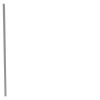

In [44]:
minx,miny,maxx,maxy=lim_mac.to_crs(4326).geometry.total_bounds
xy=[[minx,miny],[-70.6,miny],[maxx,-70.6],[minx,maxy]]

aoi_2 = ee.Geometry.Polygon(xy)
aoi_2_pol = Polygon(xy)

In [43]:
from shapely import box, LineString, normalize, Polygon, intersection
mac = intersection(aoi_2_pol, lim_mac)
#mac = lim_mac.clip(aoi_2)

GEOSException: TopologyException: side location conflict at -70.710747630203372 -34.703452443999936. This can occur if the input geometry is invalid.

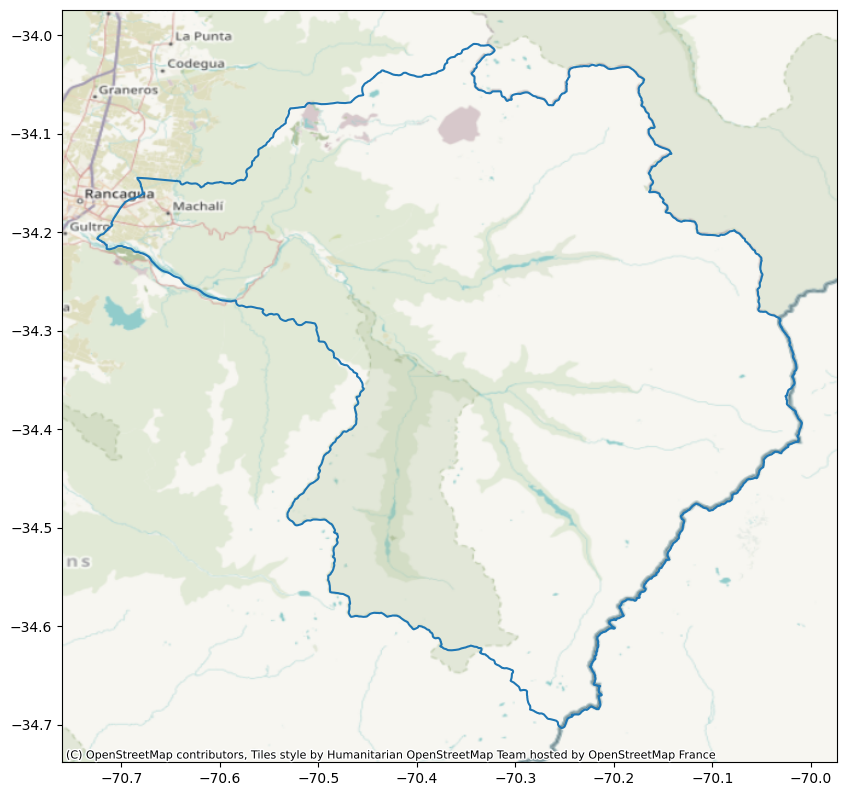

In [6]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
lim_mac.boundary.plot(ax=ax)
ctx.add_basemap(ax,crs=comuna.crs.to_string())


In [7]:
minx,miny,maxx,maxy=lim_mac.to_crs(4326).geometry.total_bounds
xy=[[minx,miny],[maxx,miny],[maxx,maxy],[minx,maxy]]

aoi = ee.Geometry.Polygon(xy)
aoi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -70.72431743399994,
              -34.703452443999936
            ],
            [
              -70.00924489699997,
              -34.703452443999936
            ],
            [
              -70.00924489699997,
              -34.00907295799993
            ],
            [
              -70.72431743399994,
              -34.00907295799993
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [8]:
#collection = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterBounds(aoi)
collection = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(aoi)

In [37]:
images=collection.aggregate_array('system:id').getInfo()
images

['COPERNICUS/S2_SR/20180213T143751_20180213T144334_T19HDC',
 'COPERNICUS/S2_SR/20180218T143749_20180218T144450_T19HCC',
 'COPERNICUS/S2_SR/20181026T143749_20181026T144726_T19HCB',
 'COPERNICUS/S2_SR/20181215T143749_20181215T144702_T19HCB',
 'COPERNICUS/S2_SR/20181215T143749_20181215T144702_T19HCC',
 'COPERNICUS/S2_SR/20181215T143749_20181215T144702_T19HDB',
 'COPERNICUS/S2_SR/20181215T143749_20181215T144702_T19HDC',
 'COPERNICUS/S2_SR/20181217T142741_20181217T143739_T19HCB',
 'COPERNICUS/S2_SR/20181217T142741_20181217T143739_T19HCC',
 'COPERNICUS/S2_SR/20181217T142741_20181217T143739_T19HDB',
 'COPERNICUS/S2_SR/20181217T142741_20181217T143739_T19HDC',
 'COPERNICUS/S2_SR/20181220T143741_20181220T144648_T19HCB',
 'COPERNICUS/S2_SR/20181220T143741_20181220T144648_T19HCC',
 'COPERNICUS/S2_SR/20181220T143741_20181220T144648_T19HDB',
 'COPERNICUS/S2_SR/20181220T143741_20181220T144648_T19HDC',
 'COPERNICUS/S2_SR/20181222T142749_20181222T143754_T19HCB',
 'COPERNICUS/S2_SR/20181222T142749_20181

In [38]:
imagen = images[-1]
len(images)

3120

In [39]:
Map = geemap.Map(center=[0.3 * miny +0.7 *  maxy,0.9 * minx + 0.1 * maxx], zoom=12)


vis_params = {"min": 0, "max": 4000, "bands": ["B4", "B3", "B2"]}

Map.addLayer(imagen, vis_params,name='Image')

Map.addLayer(aoi,name='aoi',shown=False)

Map

Map(center=[-34.21738680379993, -70.65281018029995], controls=(WidgetControl(options=['position', 'transparent…